In [ ]:
import pandas as pd
import numpy as np
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("CollegeBasketballPlayers2009-2021.csv", header = 0, low_memory = False)
df.head()

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000


In [ ]:
df.columns

Index(['player_name', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA',
       'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'Unnamed: 64', 'Unnamed: 65'],
      dtype='object')

## Data Cleaning

In [ ]:
print (df.isin([' ','NULL',0]).mean())
df.loc[:, df.isin([' ','NULL',0]).mean() < .16]
df.drop(["team", "conf", "twoPM", "twoPA", "TPM", "TPA", "blk_per", "stl_per", "yr", "num", "porpag", "adjoe", "pid", "type", "Rec Rank", "ast/tov", 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'Unnamed: 64', 'Unnamed: 65', 'rimmade', 'rimmade+rimmiss', 'midmade', 'midmade+midmiss', 'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade', 'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'drtg', 'adrtg', 'dporpag', 'stops', "ftr", "ht", "pfr", "FTA", "FTM", "year"], axis = 1, inplace = True)
print(df.columns.tolist())

player_name    0.000000
team           0.000000
conf           0.000000
GP             0.000000
Min_per        0.000377
                 ...   
stl            0.136257
blk            0.259249
pts            0.058270
Unnamed: 64    0.000000
Unnamed: 65    0.208021
Length: 66, dtype: float64
['player_name', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FT_per', 'twoP_per', 'TP_per', 'pick', 'bpm']


In [ ]:
# combine offensive and defensive rebounds

df["rb"] = df['ORB_per'] + df['DRB_per']
df.drop(["ORB_per", "DRB_per"], axis = 1, inplace = True)

In [ ]:
#  removing reduncacies
df.drop(["TS_per", 'twoP_per', "FT_per"], axis = 1, inplace=True)

In [ ]:
df.drop(['player_name'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61061 entries, 0 to 61060
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       61061 non-null  int64  
 1   Min_per  61061 non-null  float64
 2   Ortg     61061 non-null  float64
 3   usg      61061 non-null  float64
 4   eFG      61061 non-null  float64
 5   AST_per  61061 non-null  float64
 6   TO_per   61061 non-null  float64
 7   TP_per   61061 non-null  float64
 8   pick     1435 non-null   float64
 9   bpm      61016 non-null  float64
 10  rb       61061 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 5.1 MB


# Balancing data

Since 90% of players don't get picked, we don't want the model to say no every time and achieve a high accuracy. So we can balance the data to make the proportion closer.

In [ ]:
df = df[df['bpm'].isna() == False]
df['pick'] = df['pick'].fillna(0)
df.loc[df["pick"] > 0, "pick"] = 1
picked = df[df["pick"] > 0]
not_picked = df[df["pick"] == 0]

<ipython-input-10-069de2b3772b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pick'] = df['pick'].fillna(0)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
not_picked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59581 entries, 0 to 61060
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       59581 non-null  int64  
 1   Min_per  59581 non-null  float64
 2   Ortg     59581 non-null  float64
 3   usg      59581 non-null  float64
 4   eFG      59581 non-null  float64
 5   AST_per  59581 non-null  float64
 6   TO_per   59581 non-null  float64
 7   TP_per   59581 non-null  float64
 8   pick     59581 non-null  float64
 9   bpm      59581 non-null  float64
 10  rb       59581 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 5.5 MB


In [ ]:
not_picked = not_picked.sample(len(picked) * 10)

In [ ]:
balanced = pd.concat([picked, not_picked])
balanced.sample(frac = 1).reset_index(drop=True, inplace=True)

In [ ]:
#this is an old function I used to balance the data to 50/50 picked vs non-picked
def balance(df, target):
    df1 = df[df[target] == 1.0]
    df2 = df[df[target] == 0.0]
    # np.random.sample()
    size = min(len(df1), len(df2))
    df1 = df1.sample(size)
    df2 = df2.sample(size)
    return pd.concat([df1, df2])

In [ ]:
#ratio of picked players to total players in df, the true total is 1.2%
len(picked)/len(df)

0.023518421397666186

In [ ]:
print(df.columns.tolist())

['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'AST_per', 'TO_per', 'TP_per', 'pick', 'bpm', 'rb']


| Variable Name | Definition | 
| :- | :- |
| player_name | Player Name |
| GP | Games Played |
| Min-per | Minutes Percentage |
| Ortg | Offensive Rating|
| usg | Usage |
| eFG | Effective Field Goals |
| TS_per | True Shot Percentage  |
| ORB_per | Three Point Percentage |
| DRB_per | Free Throw Percentage |
| AST_per | Assist Percentage |
| FT_per | Free Throw Percentage |
| twoP_per | TP_per |
| bpm | Player Value Stat |

In [ ]:
def format_data(df):
    X = df.drop(['pick'], axis = 1).to_numpy()
    y = df['pick'].to_numpy()
    y.reshape((-1,1))
    return X, y


In [ ]:
Xn, yn = format_data(df)
# X_orig, y_orig = format_data(new_data)
X, y = format_data(balanced)

In [ ]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (15785, 10)
The shape of y is: (15785,)


In [ ]:
print ('The shape of X2 is: ' + str(Xn.shape))
print ('The shape of y2 is: ' + str(yn.shape))

The shape of X2 is: (61016, 10)
The shape of y2 is: (61016,)


In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
# normalize the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [ ]:
tf.random.set_seed(1234)
model = Sequential(
    [               
        tf.keras.Input(shape = (10,)),
        Dense(512, activation = "relu", name = 'L1'),
        Dense(256, activation = 'relu', name = 'L2'),
        Dense(1, activation = 'sigmoid', name = 'L3')

    ], name = "my_model" 
)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 512)               5632      
                                                                 
 L2 (Dense)                  (None, 256)               131328    
                                                                 
 L3 (Dense)                  (None, 1)                 257       
                                                                 
Total params: 137,217
Trainable params: 137,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:

def get_bce(lambda_, eps=0.01):
    def reg(y_true, y_pred):
        loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        false_pos_loss = lambda_ * tf.tensordot((tf.math.log(y_pred + eps)), 1 - y_true, 0)
        return loss + false_pos_loss
    return reg

def lost(y_true, y_pred):
    false_pos_loss = 0.05 * tf.tensordot((tf.math.log(y_pred + 0.01)), 1 - y_true, 0)
    return false_pos_loss


model.compile(
    loss=get_bce(0.05),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1E-3),
    metrics=["accuracy", tf.keras.metrics.Precision(), lost]
)

history = model.fit(
    X_train,y_train, 
    validation_data=(X_val, y_val),
    epochs=20
)

Epoch 1/20
296/296 [==============================] - 8s 8ms/step - loss: 0.0348 - accuracy: 0.9237 - precision: 0.6152 - lost: -0.1594 - val_loss: 0.0050 - val_accuracy: 0.9313 - val_precision: 0.6895 - val_lost: -0.1630
Epoch 2/20
296/296 [==============================] - 2s 6ms/step - loss: -0.0026 - accuracy: 0.9334 - precision: 0.6760 - lost: -0.1682 - val_loss: 0.0030 - val_accuracy: 0.9313 - val_precision: 0.6782 - val_lost: -0.1601
Epoch 3/20
296/296 [==============================] - 2s 6ms/step - loss: -0.0067 - accuracy: 0.9358 - precision: 0.6922 - lost: -0.1682 - val_loss: 0.0011 - val_accuracy: 0.9373 - val_precision: 0.7974 - val_lost: -0.1771
Epoch 4/20
296/296 [==============================] - 2s 6ms/step - loss: -0.0126 - accuracy: 0.9378 - precision: 0.7107 - lost: -0.1699 - val_loss: 0.0029 - val_accuracy: 0.9246 - val_precision: 0.5815 - val_lost: -0.1610
Epoch 5/20
296/296 [==============================] - 2s 6ms/step - loss: -0.0106 - accuracy: 0.9352 - precis

![image.png]()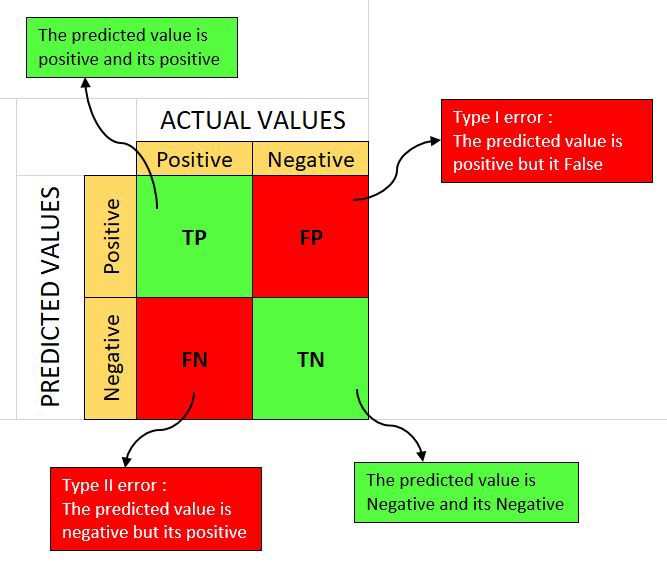

In [ ]:
y_prediction = (model.predict(X_test) > 0.5).astype(np.float32)

#Create confusion matrix and normalizes it over predicted (columns)
x = confusion_matrix(y_test, y_prediction , normalize='pred')
print(x)

99/99 [==============================] - 0s 2ms/step
[[0.94072078 0.32978723]
 [0.05927922 0.67021277]]


In [ ]:
balanced_accuracy_score(y_test, y_prediction)

0.6977511279154731

#How does balancing effect our metrics?

Different balanced data sets yield different outputs so I would like to see whether changing the proportion of picked players to not picked players changes our accuracy and whether or not we can maximize this

In [ ]:
def balance(df, target, percentage):
    df1 = df[df[target] == 1.0]
    df2 = df[df[target] == 0.0]
    x = np.rint((1-percentage) / percentage)
    df2 = df2.sample(len(df1) * int(x))
    return pd.concat([df1, df2])

In [ ]:
df1 = balance(df, "pick", 0.05)
df2 = balance(df, "pick", 0.10)
df3 = balance(df, "pick", 0.15)
df4 = balance(df, "pick", 0.20)
df5 = balance(df, "pick", 0.25)
df6 = balance(df, "pick", 0.5)
data = np.array([df1, df2, df3, df4, df5, df6])
trp = np.zeros(6)
trn = np.zeros(6)

<ipython-input-43-f23f3f7546b6>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([df1, df2, df3, df4, df5, df6])


In [ ]:
model1 = Sequential(
    [               
        tf.keras.Input(shape = (10,)),
        Dense(512, activation = "relu", name = 'L1'),
        Dense(256, activation = 'relu', name = 'L2'),
        Dense(1, activation = 'sigmoid', name = 'L3')

    ], name = "my_model" 
)
model2 = Sequential(
    [               
        tf.keras.Input(shape = (10,)),
        Dense(512, activation = "relu", name = 'L1'),
        Dense(256, activation = 'relu', name = 'L2'),
        Dense(1, activation = 'sigmoid', name = 'L3')

    ], name = "my_model" 
)
model3 = Sequential(
    [               
        tf.keras.Input(shape = (10,)),
        Dense(512, activation = "relu", name = 'L1'),
        Dense(256, activation = 'relu', name = 'L2'),
        Dense(1, activation = 'sigmoid', name = 'L3')

    ], name = "my_model" 
)
model4 = Sequential(
    [               
        tf.keras.Input(shape = (10,)),
        Dense(512, activation = "relu", name = 'L1'),
        Dense(256, activation = 'relu', name = 'L2'),
        Dense(1, activation = 'sigmoid', name = 'L3')

    ], name = "my_model" 
)
model5 = Sequential(
    [               
        tf.keras.Input(shape = (10,)),
        Dense(512, activation = "relu", name = 'L1'),
        Dense(256, activation = 'relu', name = 'L2'),
        Dense(1, activation = 'sigmoid', name = 'L3')

    ], name = "my_model" 
)
model6 = Sequential(
    [               
        tf.keras.Input(shape = (10,)),
        Dense(512, activation = "relu", name = 'L1'),
        Dense(256, activation = 'relu', name = 'L2'),
        Dense(1, activation = 'sigmoid', name = 'L3')

    ], name = "my_model" 
)
models = np.array([model1, model2, model3, model4, model5, model6])

In [ ]:
for i in range(len(models)):
    X, y = format_data(data[i])
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)
    X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    model = models[i]
    model.compile(
      loss=get_bce(0.05),
      optimizer=tf.keras.optimizers.Adam(learning_rate=1E-3),
      metrics=["accuracy", tf.keras.metrics.Precision(), lost]
    )
    model.fit(
      X_train,y_train, 
      validation_data=(X_val, y_val),
      epochs=15
    )
    y_prediction = (model.predict(X_test) > 0.5).astype(np.float32)
    #Create confusion matrix and normalizes it over predicted (columns)
    tp = confusion_matrix(y_test, y_prediction , normalize='pred')[0][0]
    tn = confusion_matrix(y_test, y_prediction , normalize='pred')[1][1]
    trp[i] = tp
    trn[i] = tn


Epoch 1/15
539/539 [==============================] - 5s 7ms/step - loss: -0.0417 - accuracy: 0.9525 - precision_7: 0.5779 - lost: -0.1834 - val_loss: -0.0815 - val_accuracy: 0.9571 - val_precision_7: 0.7143 - val_lost: -0.1940
Epoch 2/15
539/539 [==============================] - 3s 6ms/step - loss: -0.0664 - accuracy: 0.9553 - precision_7: 0.6299 - lost: -0.1893 - val_loss: -0.0799 - val_accuracy: 0.9554 - val_precision_7: 0.8889 - val_lost: -0.1970
Epoch 3/15
539/539 [==============================] - 3s 6ms/step - loss: -0.0705 - accuracy: 0.9574 - precision_7: 0.6772 - lost: -0.1901 - val_loss: -0.0882 - val_accuracy: 0.9589 - val_precision_7: 0.7125 - val_lost: -0.1932
Epoch 4/15
539/539 [==============================] - 3s 6ms/step - loss: -0.0719 - accuracy: 0.9572 - precision_7: 0.6639 - lost: -0.1903 - val_loss: -0.0760 - val_accuracy: 0.9561 - val_precision_7: 0.5402 - val_lost: -0.1814
Epoch 5/15
539/539 [==============================] - 4s 8ms/step - loss: -0.0742 - accu

In [ ]:
print(trp)
print(trn)
  

[0.96025664 0.93471044 0.94029851 0.9293617  0.91454965 0.90234375]
[0.66666667 0.77358491 0.75655431 0.75384615 0.75177305 0.83647799]


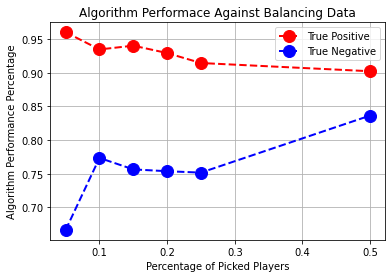

In [ ]:
x = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.5])
plt.figure()
plt.scatter(x, trp, c = 'red')
plt.scatter(x, trn, c = 'blue')
plt.plot(x, trp, c = 'red', label = "True Positive", marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.plot(x, trn, c = 'blue', label = "True Negative", marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel('Percentage of Picked Players')
plt.ylabel('Algorithm Performance Percentage')
plt.title('Algorithm Performace Against Balancing Data')
plt.grid(True)
plt.legend()
plt.show()